In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression 
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder
from sklearn.compose import ColumnTransformer 
import joblib

# Task # 1
In dataset "Fish.csv", Take Species, Length, Width as Input and predict its height using Linear Regression. You can validate your model through Descent Gradient approach to check results.

In [2]:
fish_df = pd.read_csv("DataSets/Fish.csv")
fish_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## cLEAN AND PROCESS THE DATA

In [3]:
fish_df.isna().sum()    # so no need to clean

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [4]:
fish_df.drop_duplicates().shape

(159, 7)

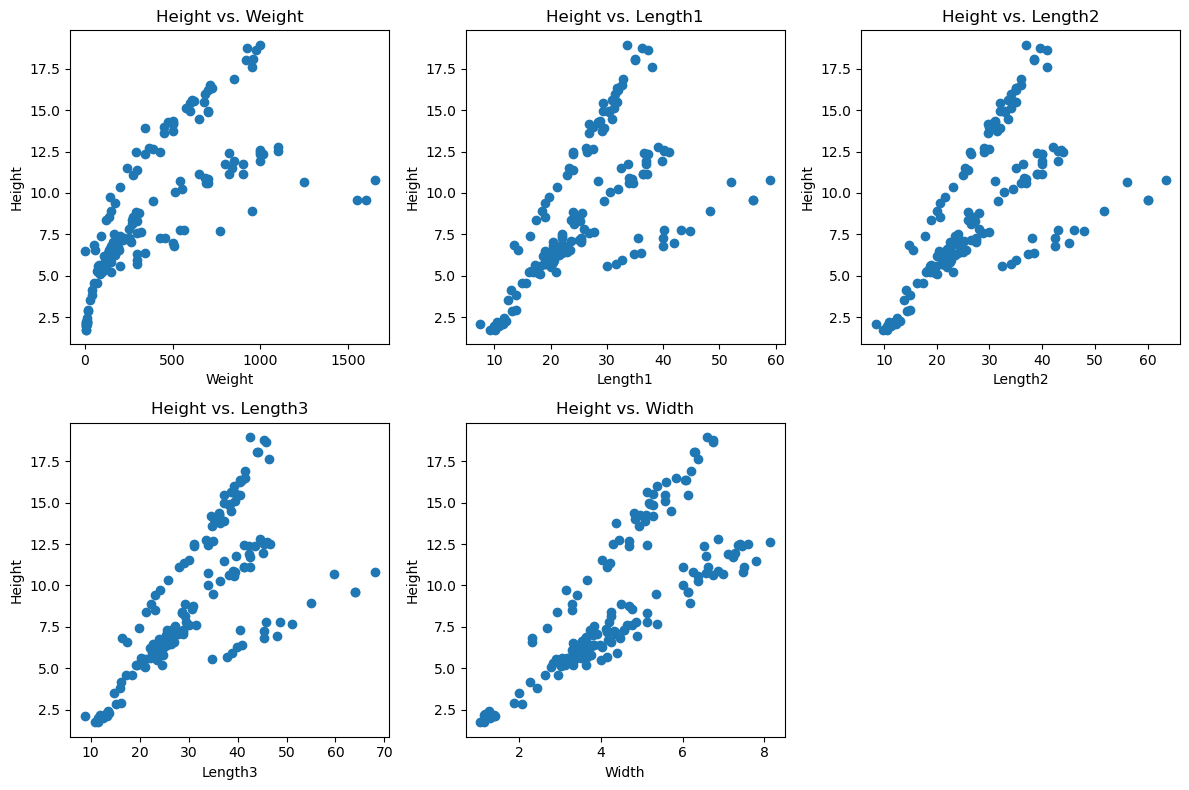

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

fish_df = pd.read_csv("DataSets/Fish.csv")
height = fish_df['Height']
weight = fish_df['Weight']
length1 = fish_df['Length1']
length2 = fish_df['Length2']
length3 = fish_df['Length3']
width = fish_df['Width']

# Set the figure size
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Plot Height vs. Weight
axes[0, 0].scatter(weight, height)
axes[0, 0].set_xlabel('Weight')
axes[0, 0].set_ylabel('Height')
axes[0, 0].set_title('Height vs. Weight')

# Plot Height vs. Length1
axes[0, 1].scatter(length1, height)
axes[0, 1].set_xlabel('Length1')
axes[0, 1].set_ylabel('Height')
axes[0, 1].set_title('Height vs. Length1')

# Plot Height vs. Length2
axes[0, 2].scatter(length2, height)
axes[0, 2].set_xlabel('Length2')
axes[0, 2].set_ylabel('Height')
axes[0, 2].set_title('Height vs. Length2')

# Plot Height vs. Length3
axes[1, 0].scatter(length3, height)
axes[1, 0].set_xlabel('Length3')
axes[1, 0].set_ylabel('Height')
axes[1, 0].set_title('Height vs. Length3')

# Plot Height vs. Width
axes[1, 1].scatter(width, height)
axes[1, 1].set_xlabel('Width')
axes[1, 1].set_ylabel('Height')
axes[1, 1].set_title('Height vs. Width')

# Remove empty subplot
axes[1, 2].remove()

plt.tight_layout()
plt.show()

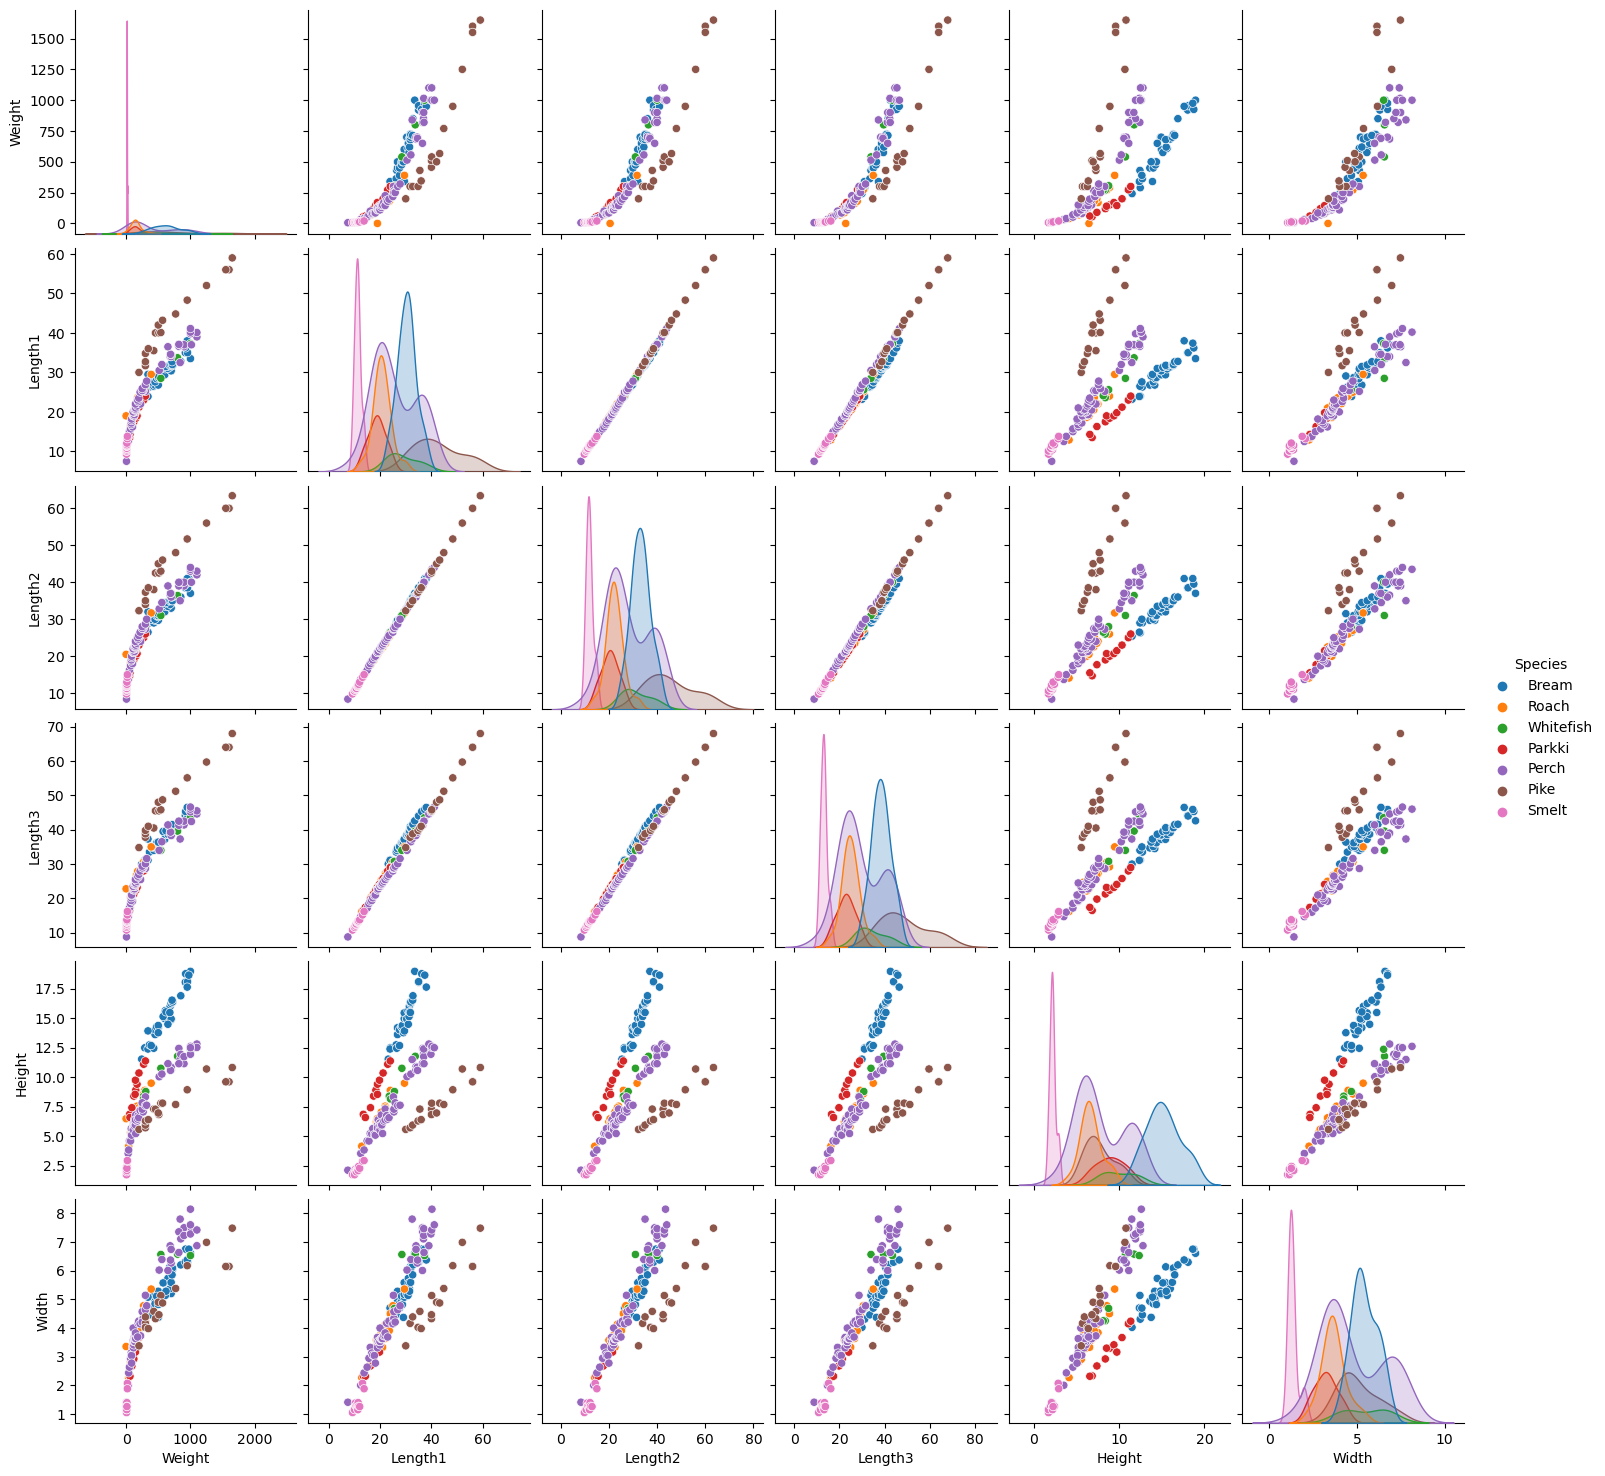

In [6]:
import seaborn as sns
sns.pairplot(data=fish_df,hue="Species");

### First Apply basic model to evaluate the Dataset

In [7]:
x = fish_df.drop("Height",axis=1)
y = fish_df["Height"]
x["Species"].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [8]:
category = ["Species"]
encode = OneHotEncoder()

transf = ColumnTransformer([("encode",encode,category)],remainder="passthrough")
transformed_x = transf.fit_transform(x)
transformed_x

array([[ 1.    ,  0.    ,  0.    , ..., 25.4   , 30.    ,  4.02  ],
       [ 1.    ,  0.    ,  0.    , ..., 26.3   , 31.2   ,  4.3056],
       [ 1.    ,  0.    ,  0.    , ..., 26.5   , 31.1   ,  4.6961],
       ...,
       [ 0.    ,  0.    ,  0.    , ..., 13.    , 13.8   ,  1.2558],
       [ 0.    ,  0.    ,  0.    , ..., 14.3   , 15.2   ,  2.0672],
       [ 0.    ,  0.    ,  0.    , ..., 15.    , 16.2   ,  1.8792]])

In [9]:
x_train ,x_test ,y_train ,y_test = train_test_split(transformed_x,y,test_size=0.2,random_state=42)

In [10]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [11]:
model.score(x_test,y_test)

0.980397551332076

In [12]:
y_pred = model.predict(x_test)

pd.DataFrame({"y_test":y_test ,"y_pred":y_pred})

,y_test,y_pred
78,5.1992,4.999679
155,2.4300,2.130787
128,5.5680,4.321885
55,8.3804,7.996653
94,5.2185,6.162787
29,18.9570,16.658972
147,1.7284,1.769991
51,7.0866,7.286182
98,6.7334,6.927047
141,10.6863,10.812777


## Gradient Decsent Method

In [13]:
import numpy as np
cost = float('inf')
def gradient_Descent(X,Y):
    m_curr = c_curr =0
    iteration = 10000
    LearningRate = 0.00001
    n = len(X)
    cost = float('inf')
    i=0
    for i in range(iteration):
        
        cost_prev_val = cost
        y_predicted = (m_curr * X) + c_curr
        cost = 1/n * np.sum([val**2 for val in (Y - y_predicted)])
        mp =-(2/n) * np.sum(X*(Y-y_predicted))
       
        cp = -(2/n) * np.sum(Y-y_predicted)
        m_curr = m_curr - LearningRate * mp 
        c_curr = c_curr - LearningRate * cp
        
        print("m_curr =" , m_curr)
        print("c_curr =" , c_curr)
        print("cost =" , cost)
        print("\nitteration =" , i)
        
        



In [19]:
X =np.array([4 ,8,9,10,12,14,15]) 
Y =np.array([12 ,15,17,20,25,30,35])

In [20]:
gradient_Descent(X,Y)

m_curr = 0.005045714285714286
c_curr = 0.00044
cost = 544.0

itteration = 0
m_curr = 0.010079430171428571
c_curr = 0.0008789532244897959
cost = 541.4377667886694

itteration = 1
m_curr = 0.015101176188703533
c_curr = 0.0013168621626471837
cost = 538.8877047990194

itteration = 2
m_curr = 0.020110980801253304
c_curr = 0.001753729297730826
cost = 536.3497562148308

itteration = 3
m_curr = 0.025108872405106814
c_curr = 0.0021895571070943277
cost = 533.823863494525

itteration = 4
m_curr = 0.030094879328768732
c_curr = 0.0026243480622002782
cost = 531.3099693698597

itteration = 5
m_curr = 0.03506902983338004
c_curr = 0.003058104628634259
cost = 528.8080168446309

itteration = 6
m_curr = 0.04003135211287823
c_curr = 0.0034908292661188197
cost = 526.3179491933796

itteration = 7
m_curr = 0.04498187429415709
c_curr = 0.003922524428527419
cost = 523.8397099601067

itteration = 8
m_curr = 0.049920624437226155
c_curr = 0.0043531925638983365
cost = 521.3732429569925

itteration = 9
m_curr = 0.05

# Task 2
In dataset "Salary.csv", Take no. of years as Input and Predict Employee Salary. Since its 2D dataset, check and validate model using Linear Regression by Gradient descent approach

#### LinearRegression model

In [126]:


# Import libraries
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,mean_absolute_error ,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression 
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder
from sklearn.compose import ColumnTransformer 
import joblib

In [127]:
Salary_df = pd.read_csv("DataSets/Salary_dataset.csv")
Salary_df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [128]:
x = np.array(Salary_df["YearsExperience"]).reshape(-1, 1) 
y = np.array(Salary_df["Salary"])


In [129]:
x_train ,x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [130]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [131]:
model.score(x_test,y_test)

0.9414466227178215

In [132]:
y_pred = model.predict(x_test)

pd.DataFrame({"y_test":y_test ,"y_pred_using_model":y_pred})

,y_test,y_pred_using_model
0,112636.0,115574.622884
1,67939.0,71680.938782
2,113813.0,102499.908470
3,83089.0,75416.571471
4,64446.0,55804.499851
5,57190.0,60474.040713
6,122392.0,122111.980090
7,109432.0,107169.449332
8,56958.0,63275.765230


In [133]:
mse = mean_squared_error(x_train,y_train)
print(f"Mean Squared Error: {mse}")


mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 5728211930.733333
Mean Absolute Error: 5161.328710400178


## Gradient Descent

In [136]:
import numpy as np
cost = float('inf')
def gradient_Descent(X,Y):
    m_curr = c_curr =0
    iteration = 1000
    LearningRate = 0.01
    n = len(X)
    
    i=0
    for i in range(iteration):
        
        
        y_predicted = (m_curr * X) + c_curr
        cost = 1/n * np.sum([val**2 for val in (Y - y_predicted)])
        mp =-(2/n) * np.sum(X*(Y-y_predicted))
       
        cp = -(2/n) * np.sum(Y-y_predicted)
        m_curr = m_curr - LearningRate * mp 
        c_curr = c_curr - LearningRate * cp
        
        print("m_curr =" , m_curr)
        print("c_curr =" , c_curr)
        print("cost =" , cost)
        print("\nitteration =" , i)
        

In [137]:
gradient_Descent(x_train.reshape(1,-1)[0],y_train.reshape(1,-1)[0])

m_curr = 8404.894952380952
c_curr = 1421.1666666666665
cost = 5729052388.428571

itteration = 0
m_curr = 11324.05493726984
c_curr = 1984.6270313650793
cost = 829153490.1542935

itteration = 1
m_curr = 12331.03441578582
c_curr = 2248.7944035938203
cost = 232785257.9968874

itteration = 2
m_curr = 12671.510431905734
c_curr = 2408.3231198310764
cost = 159345922.31560725

itteration = 3
m_curr = 12779.70353510464
c_curr = 2531.067628153089
cost = 149456334.34341758

itteration = 4
m_curr = 12806.97503318127
c_curr = 2640.682193459703
cost = 147297477.55180228

itteration = 5
m_curr = 12806.086554704245
c_curr = 2745.413679649957
cost = 146086729.865388

itteration = 6
m_curr = 12795.429641901168
c_curr = 2848.138199326139
cost = 144999858.18313065

itteration = 7
m_curr = 12781.415039699465
c_curr = 2949.859710672034
cost = 143936631.05710214

itteration = 8
m_curr = 12766.27720204525
c_curr = 3050.929565874913
cost = 142884790.85005066

itteration = 9
m_curr = 12750.794803425766
c_curr = 

In [138]:
m = 9375.586570542466
c =  24752.98764930146



In [139]:
 y = m*x  + c

In [140]:
x_values = x_test.reshape(1,-1)[0]

y_values = []

for x in x_values:
    y = m * x + c
    y_values.append(y)

print("Resulting y values:", y_values)

Resulting y values: [115696.17738356336, 71630.92050201379, 102570.35618480391, 75381.15513023078, 55692.423332091596, 60380.21661736283, 122259.0879829431, 107258.14947007515, 63192.89258852557]


In [141]:
pd.DataFrame({"y_test":y_test ,"y_pred_Gradient":y_values})

,y_test,y_pred_Gradient
0,112636.0,115696.177384
1,67939.0,71630.920502
2,113813.0,102570.356185
3,83089.0,75381.155130
4,64446.0,55692.423332
5,57190.0,60380.216617
6,122392.0,122259.087983
7,109432.0,107258.149470
8,56958.0,63192.892589
